<a href="https://colab.research.google.com/github/otifi3/Bike_share/blob/main/B_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
"""

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
hourly_data = pd.read_csv("/content/drive/MyDrive/DA_Projects/Bike_shareING/hour.csv")

In [ ]:
hourly_data

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [ ]:
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:{hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:0


In [ ]:
hourly_data.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

In [ ]:
preprocessed_data = hourly_data.copy()

In [ ]:
#map Seasons
seasons_mapping = {1: 'winter', 2: 'spring',3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])
#map Years
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])
#map Weeks
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday',3: 'Wednesday', 4: 'Thursday', 5: 'Friday',6: 'Saturday'}
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])
#map Weather
weather_mapping = {1: 'clear', 2: 'cloudy',3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x:weather_mapping[x])
#rescale hum and windspead
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67

In [ ]:
preprocessed_data

instant      dteday  season    yr  mnth  hr  holiday   weekday  \
0            1  2011-01-01  winter  2011     1   0        0  Saturday   
1            2  2011-01-01  winter  2011     1   1        0  Saturday   
2            3  2011-01-01  winter  2011     1   2        0  Saturday   
3            4  2011-01-01  winter  2011     1   3        0  Saturday   
4            5  2011-01-01  winter  2011     1   4        0  Saturday   
...        ...         ...     ...   ...   ...  ..      ...       ...   
17374    17375  2012-12-31  winter  2012    12  19        0    Monday   
17375    17376  2012-12-31  winter  2012    12  20        0    Monday   
17376    17377  2012-12-31  winter  2012    12  21        0    Monday   
17377    17378  2012-12-31  winter  2012    12  22        0    Monday   
17378    17379  2012-12-31  winter  2012    12  23        0    Monday   

       workingday weathersit  temp   atemp   hum  windspeed  casual  \
0               0      clear  0.24  0.2879  81.0     0.0000       3   
1               0      clear  0.22  0.2727  80.0     0.0000       8   
2               0      clear  0.22  0.2727  80.0     0.0000       5   
3               0      clear  0.24  0.2879  75.0     0.0000       3   
4               0      clear  0.24  0.2879  75.0     0.0000       0   
...           ...        ...   ...     ...   ...        ...     ...   
17374           1     cloudy  0.26  0.2576  60.0    11.0014      11   
17375           1     cloudy  0.26  0.2576  60.0    11.0014       8   
17376           1      clear  0.26  0.2576  60.0    11.0014       7   
17377           1      clear  0.26  0.2727  56.0     8.9981      13   
17378           1      clear  0.26  0.2727  65.0     8.9981      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

# Ploting and Tests

Text(0.5, 1.0, 'Rides distributions')

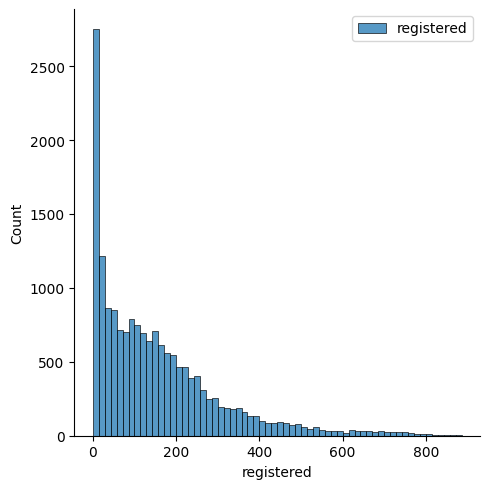

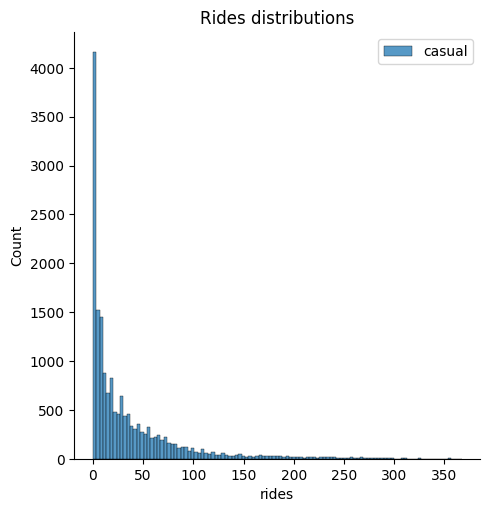

In [ ]:
sns.displot(preprocessed_data['registered'], label='registered')
plt.legend()
sns.displot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")

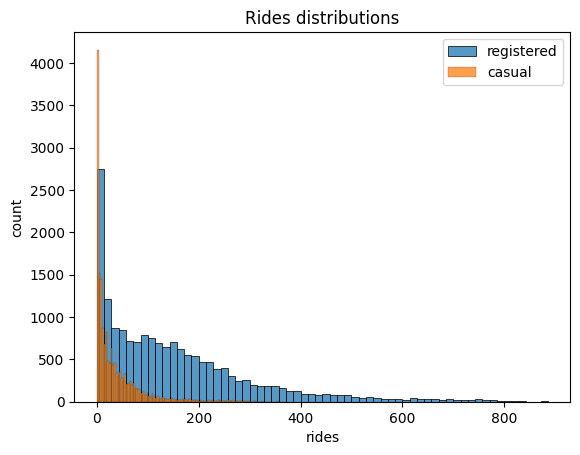

In [ ]:
fig, ax = plt.subplots()
sns.histplot(preprocessed_data['registered'], ax=ax,label='registered')
sns.histplot(preprocessed_data['casual'],ax=ax, label='casual')
plt.legend()
ax.set_xlabel('rides')
ax.set_ylabel('count')
ax.set_title("Rides distributions")
plt.show()

In [ ]:
"""
from the plot we can see that reg riders perform more rides than casual ones and that was expected
"""

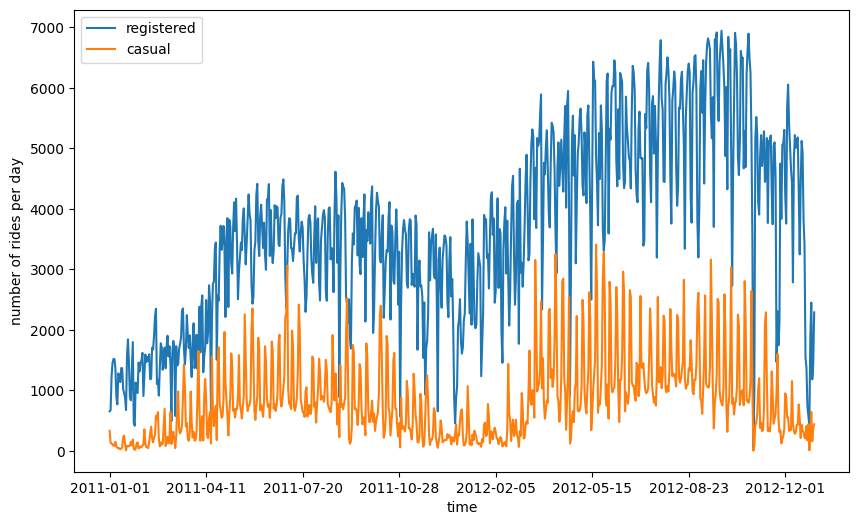

In [ ]:
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day")
plt.show()

In [ ]:
"""
-here are the sum of ref and casual rides for each day
-and for all days reg rides are more than casual ones
-during winter no. of rides become less than in other seasons
"""

Text(0, 0.5, 'number of rides per day')

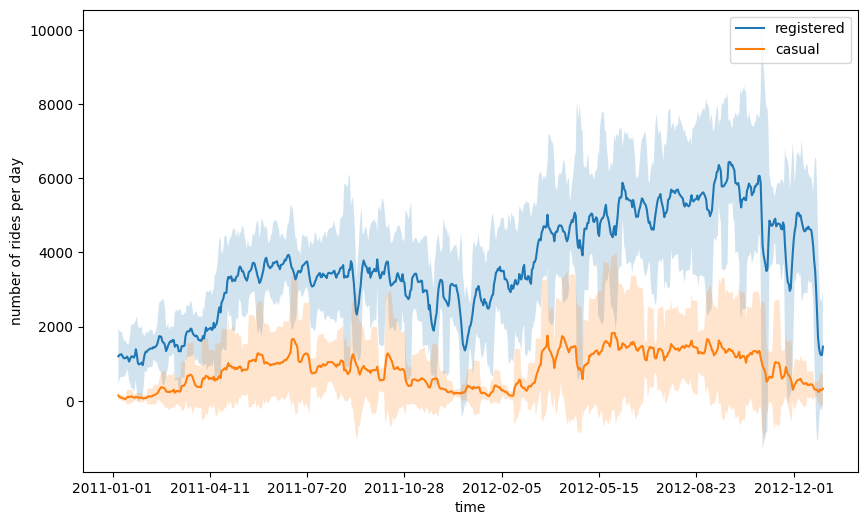

In [ ]:
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'], rolling_means['registered'] - 2*rolling_deviations['registered'],alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'],rolling_means['casual'] - 2*rolling_deviations['casual'],alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day")

In [ ]:
"""

"""

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


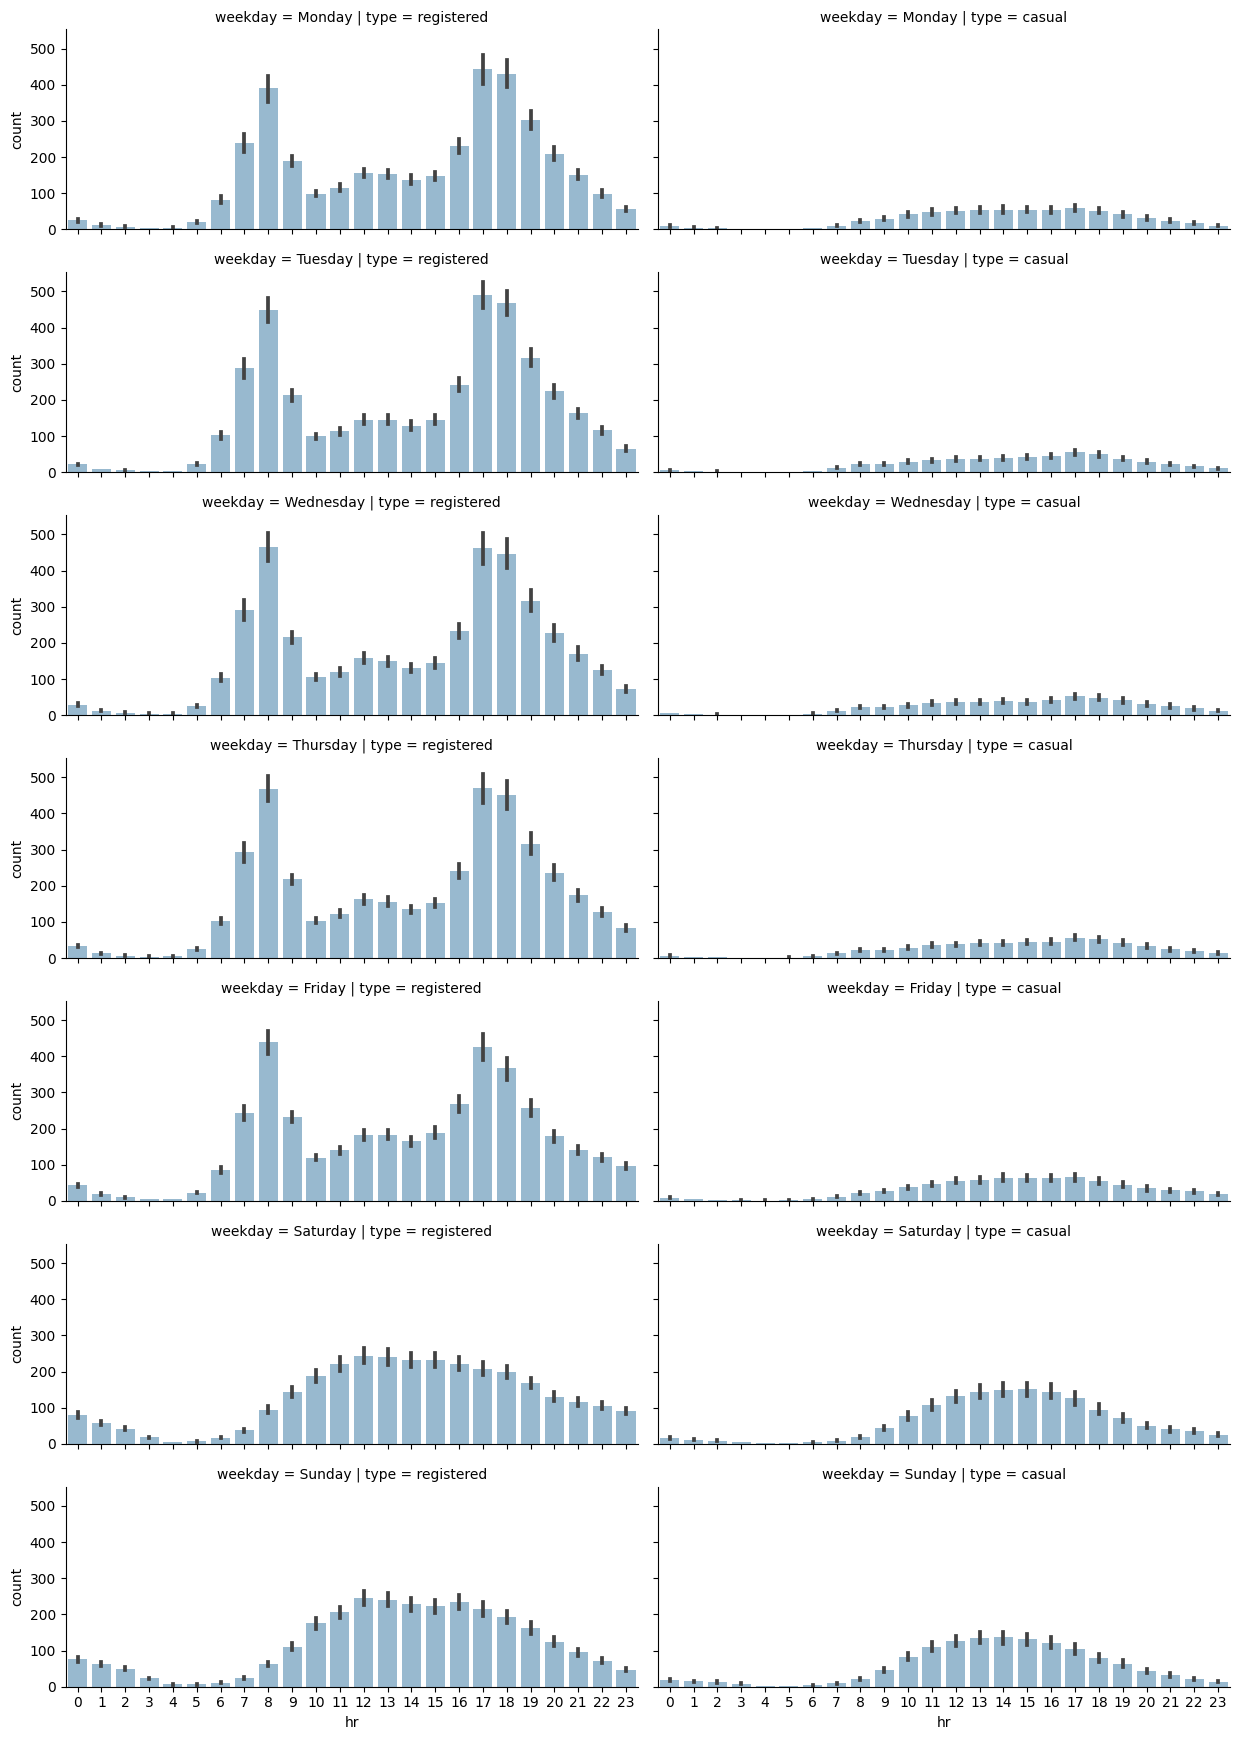

In [ ]:
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['hr', 'weekday'],var_name='type', value_name='count')
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
plt.show()

In [ ]:
"""
-from this we get which day have more rides and which houre in the day has has more rides and thies type
-most of reg rides at early hours and most of cas rides at the end of the day
- special case in weekends most of the rides become in later hours and in weekend more cas rides counted
"""

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


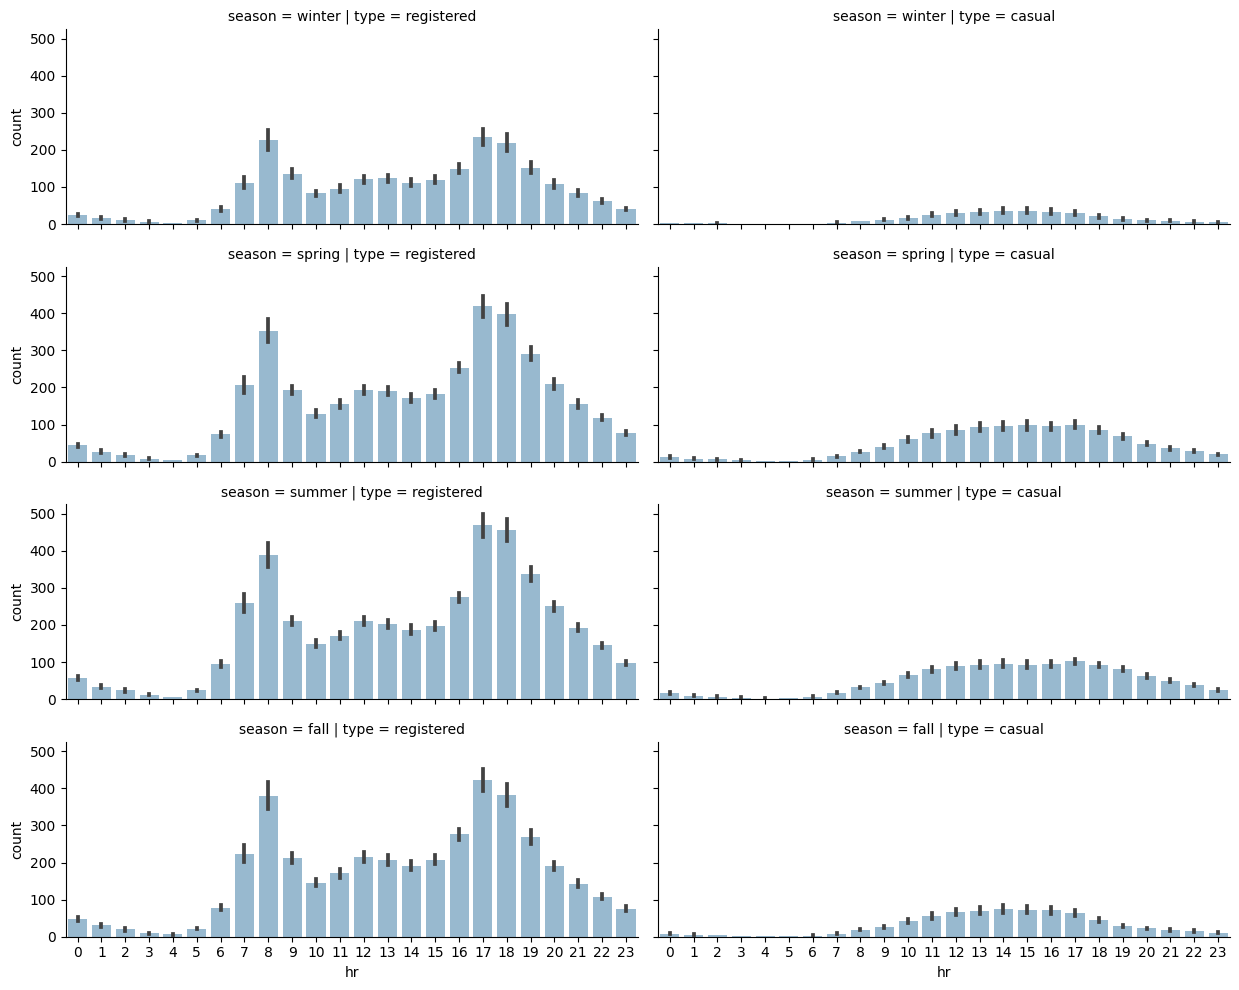

In [ ]:
plot_data = preprocessed_data[['hr', 'season','registered', 'casual']]
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name='count')
grid = sns.FacetGrid(plot_data, row='season',   col='type', height=2.5, aspect=2.5,row_order=['winter', 'spring','summer', 'fall'])
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
plt.show()

In [ ]:
"""
as expected and showed in the plots above winter is the most season has min rides
"""


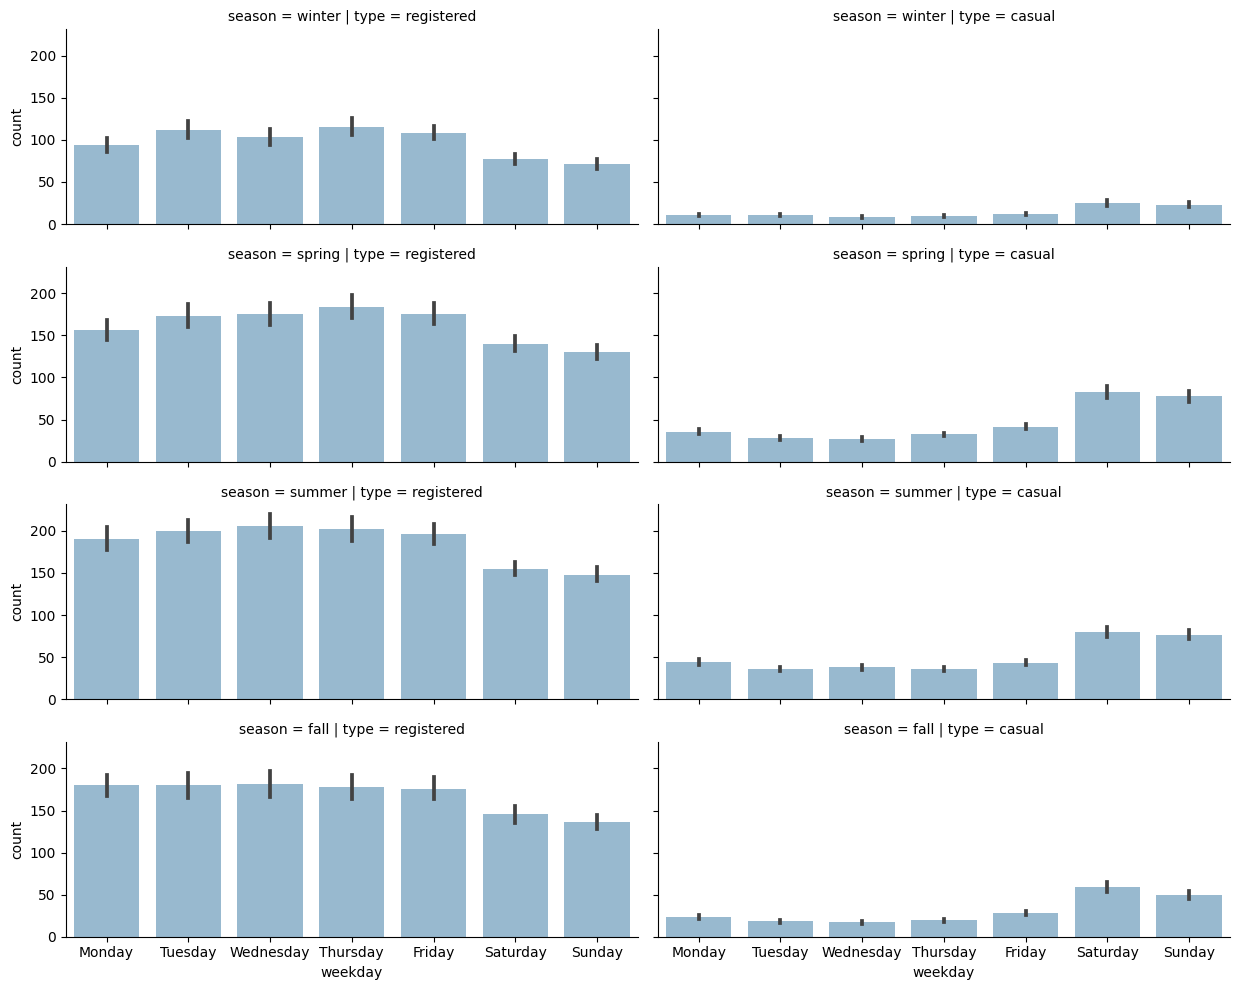

In [ ]:
plot_data = preprocessed_data[['weekday', 'season','registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'],var_name='type', value_name='count')
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5,  row_order=['winter', 'spring','summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
plt.show()
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")

In [ ]:
"""
as at showd most for the cas rises in weekends and for reg rides it dist equaly but become slightly less in weekends
"""

In [ ]:
population_mean = preprocessed_data.registered.mean()
sample = preprocessed_data[(preprocessed_data.season == "summer") & (preprocessed_data.yr == 2011)].registered

In [ ]:
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]},p-value: {test_result[1]}")

Test statistic: -3.4919691483786197,p-value: 0.0004887645279519505


In [ ]:
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]:.03f}, p-value: {test_result_unbiased[1]:.03f}")

Unbiased test statistic: -2.557, p-value: 0.011


In [ ]:
"""
by taking random sample each time istead of the biased sample from 2011 it make better results on p-value as it was accepted some the times
"""

In [ ]:
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [ ]:
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


In [ ]:
"""
as intial con it differ from workday and weekend as it showed in test
"""

<ipython-input-20-1357c19e72cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
<ipython-input-20-1357c19e72cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingdays_data, label='working days')


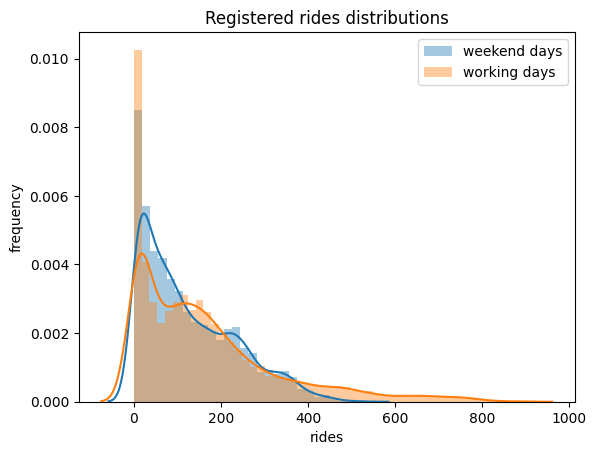

In [ ]:
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")
plt.show()

In [ ]:
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")


Statistic value: 41.077, p-value: 0.000


<ipython-input-22-b191d7dc4b25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
<ipython-input-22-b191d7dc4b25>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingdays_data, label='working days')


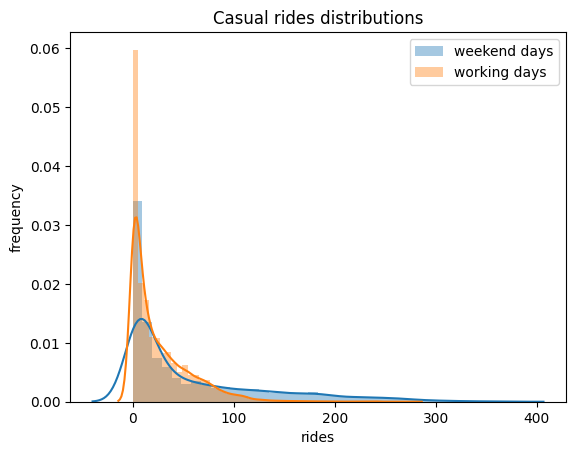

In [ ]:
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
plt.show()

# Wheather Analysis

In [ ]:
def plot_correlations(data, col):
  corr_r = np.corrcoef(data[col], data["registered"])[0,1]
  ax = sns.regplot(x=col, y="registered", data=data, scatter_kws={"alpha":0.05}, label=f"Registered rides(correlation: {corr_r:.3f})")
  corr_c = np.corrcoef(data[col], data["casual"])[0,1]
  ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha":0.05}, label=f"Casual rides (correlation: {corr_c:.3f})")
  legend = ax.legend()
  for lh in legend.legendHandles:
      lh.set_alpha(0.5)
      ax.set_ylabel("rides")
      ax.set_title(f"Correlation between rides and {col}")
  return ax


<ipython-input-9-ea75f609b519>:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


<function matplotlib.pyplot.show(close=None, block=None)>

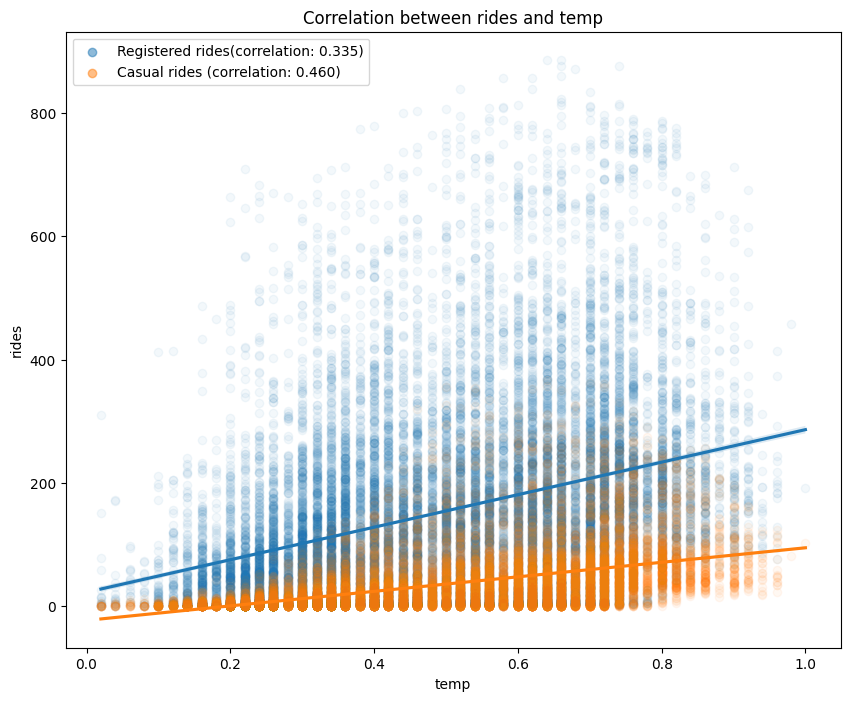

In [ ]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.show()


<ipython-input-9-ea75f609b519>:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


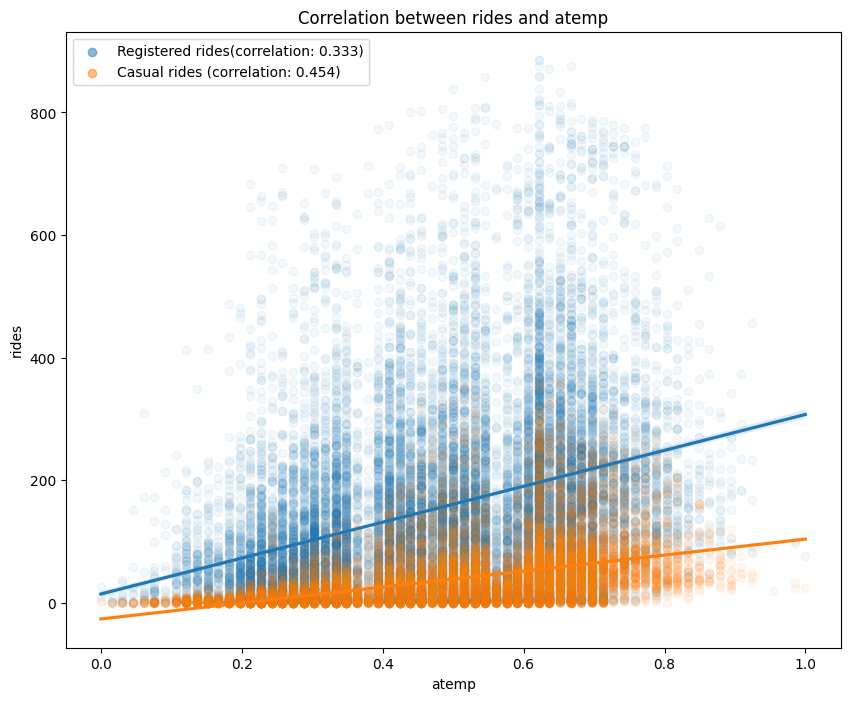

In [ ]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.show()

<ipython-input-9-ea75f609b519>:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


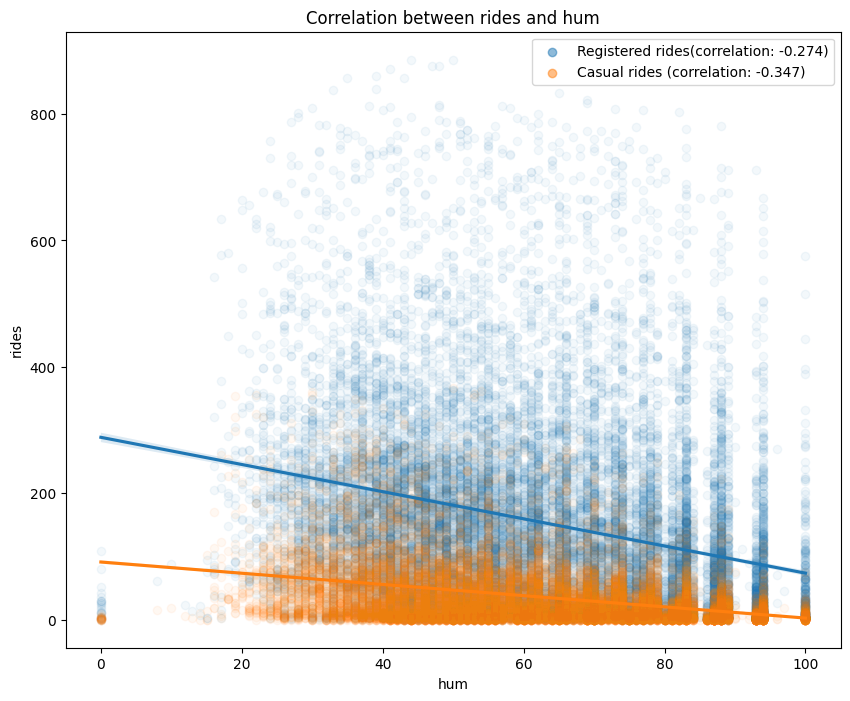

In [ ]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.show()

<ipython-input-9-ea75f609b519>:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


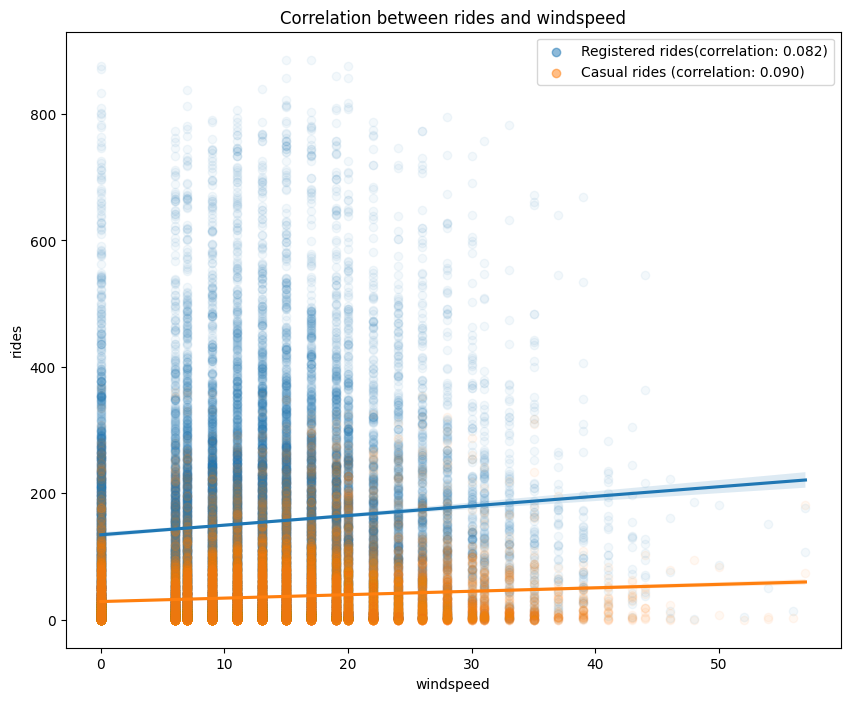

In [ ]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.show()

In [ ]:
"""
first 2 plots have pos affect on the no. of the rides
third one has neg one
and for the last one its affect its not that big like the first 3 ones
"""

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,"Spearman (registered)": spearman_reg,"Pearson (casual)": pearson_cas,"Spearman (casual)": spearman_cas})

In [ ]:
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)","Pearson (casual)", "Spearman (casual)"])
for col in cols:
    corr_data[col]=compute_correlations(preprocessed_data, col)
corr_data.T

Pearson (registered)  Spearman (registered)  Pearson (casual)  \
temp                   0.335361               0.373196          0.459616   
atemp                  0.332559               0.373014          0.454080   
hum                   -0.273933              -0.338480         -0.347028   
windspeed              0.082321               0.122936          0.090287   

           Spearman (casual)  
temp                0.570989  
atemp               0.570419  
hum                -0.388213  
windspeed           0.122920

In [ ]:
"""
here to make sure that the assumtion of that the relation between each of the 2 variables are linear
,so spearman rank corr to determent that and test that assumtion
"""

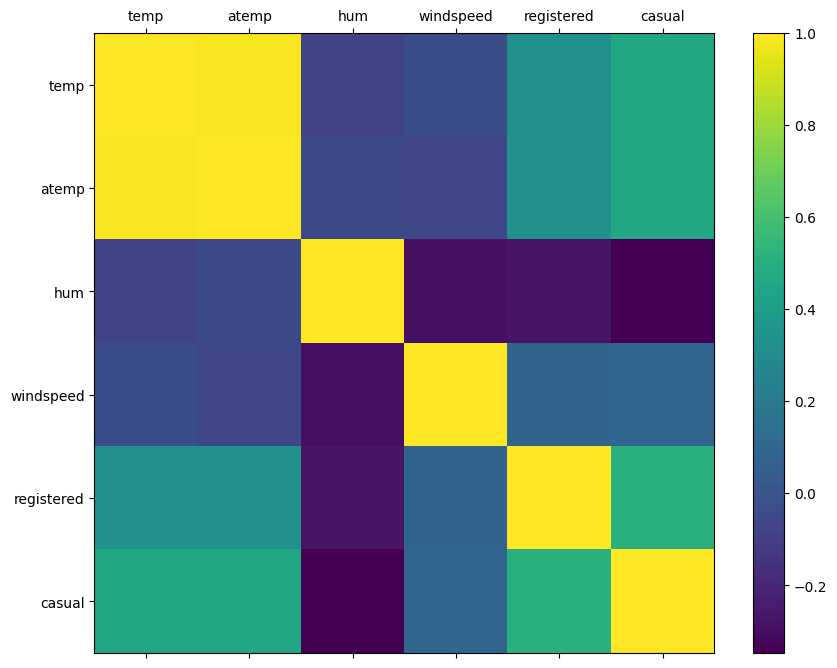

In [ ]:
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
plt.show()

# Time Series Analysis

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts, window=10, **kwargs):
  # create dataframe for plotting
  plot_data = pd.DataFrame(ts)
  plot_data['rolling_mean'] = ts.rolling(window).mean()
  plot_data['rolling_std'] = ts.rolling(window).std()
  # compute p-value of Dickey-Fuller test
  p_val = adfuller(ts)[1]
  ax = plot_data.plot(**kwargs)
  ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")



In [ ]:
daily_rides = preprocessed_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()
# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

<Figure size 640x480 with 0 Axes>

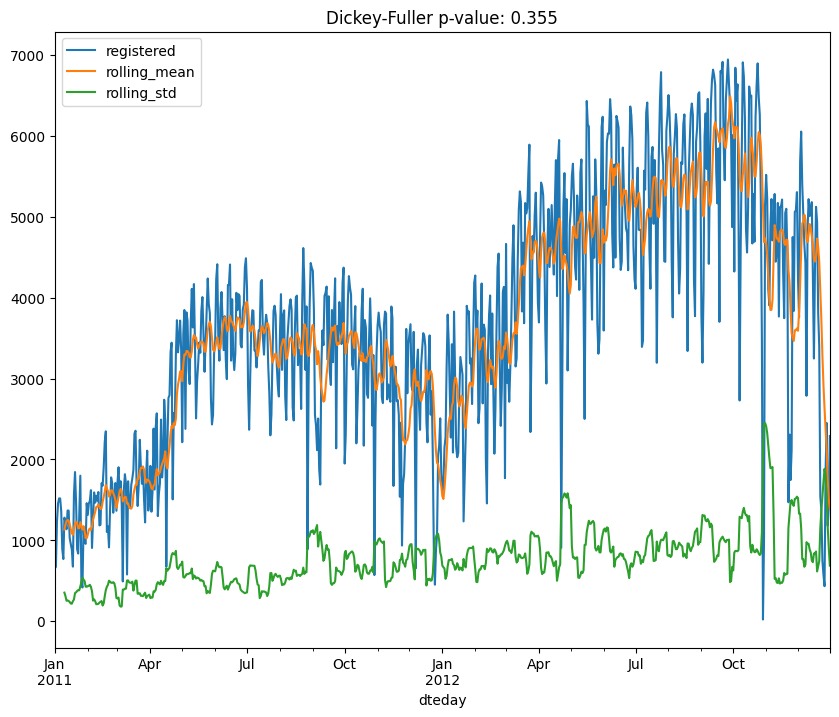

In [ ]:
plt.figure()
test_stationarity(daily_rides.registered, figsize=(10, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

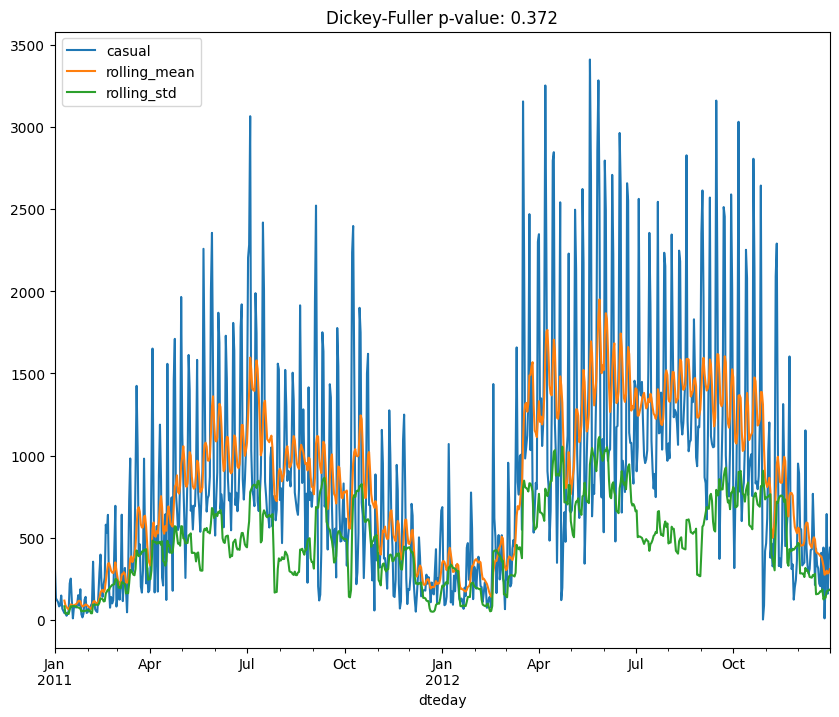

In [ ]:
plt.figure()
test_stationarity(daily_rides.casual, figsize=(10, 8))
plt.show()

In [ ]:
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)
casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)


In [ ]:
"""
here we make data stationary by subtract the rolling mean from each window
the other approch is to  subract the last value
"""

<Figure size 640x480 with 0 Axes>

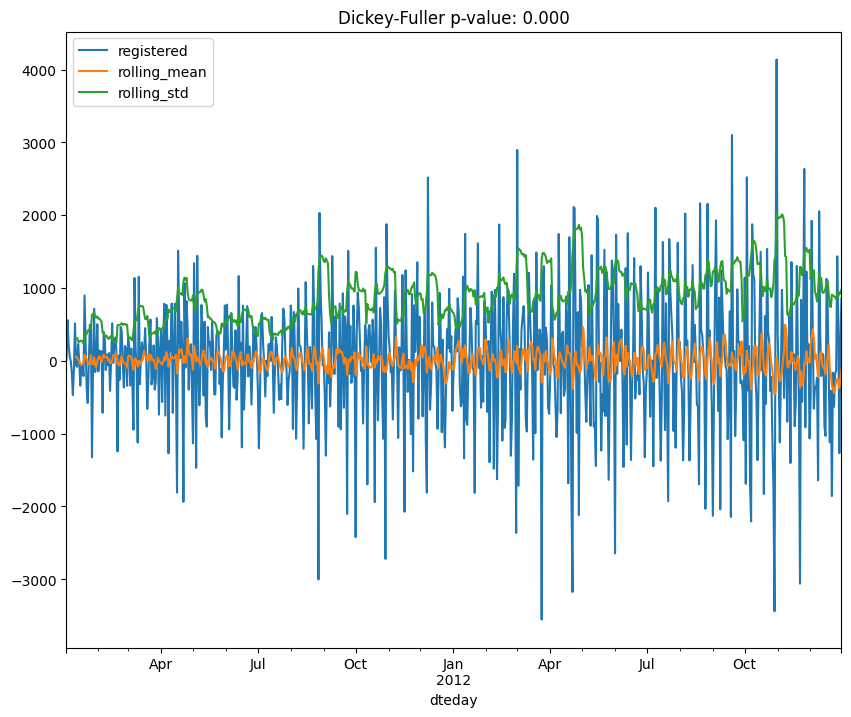

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)
casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)
plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))
plt.show

<Figure size 640x480 with 0 Axes>

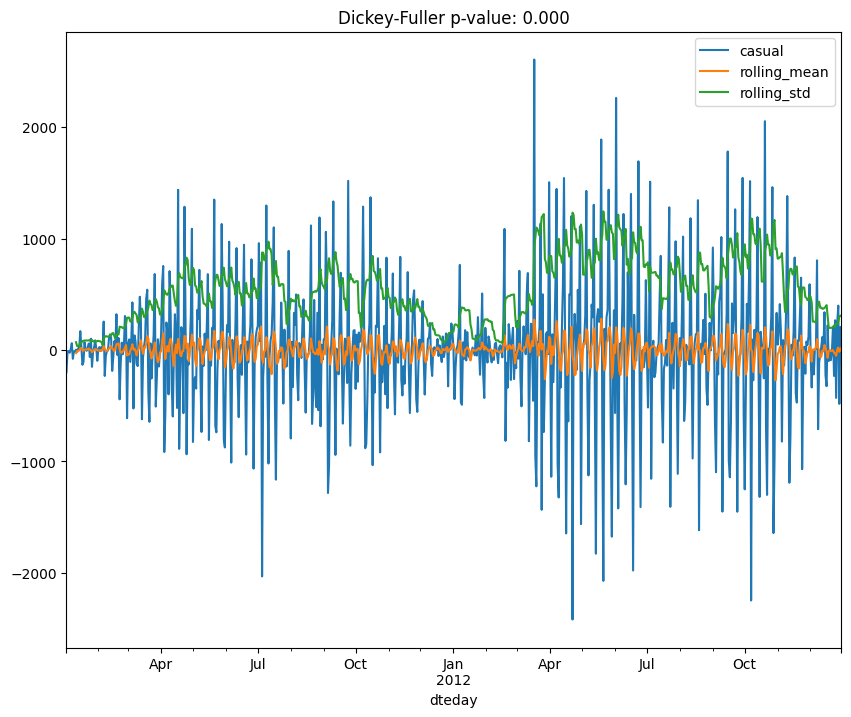

In [ ]:
plt.figure()
test_stationarity(casual_diff, figsize=(10, 8))
plt.show()

In [ ]:
"""
as it showed it made the data stationary and the p-value is less than 0.05 so we can reject the {Ho} which means data is stationay and we
accepted {Ha}


with stationary data we made sure that our assumtions of that during winter ther are less casual rides than reg rides
"""

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])


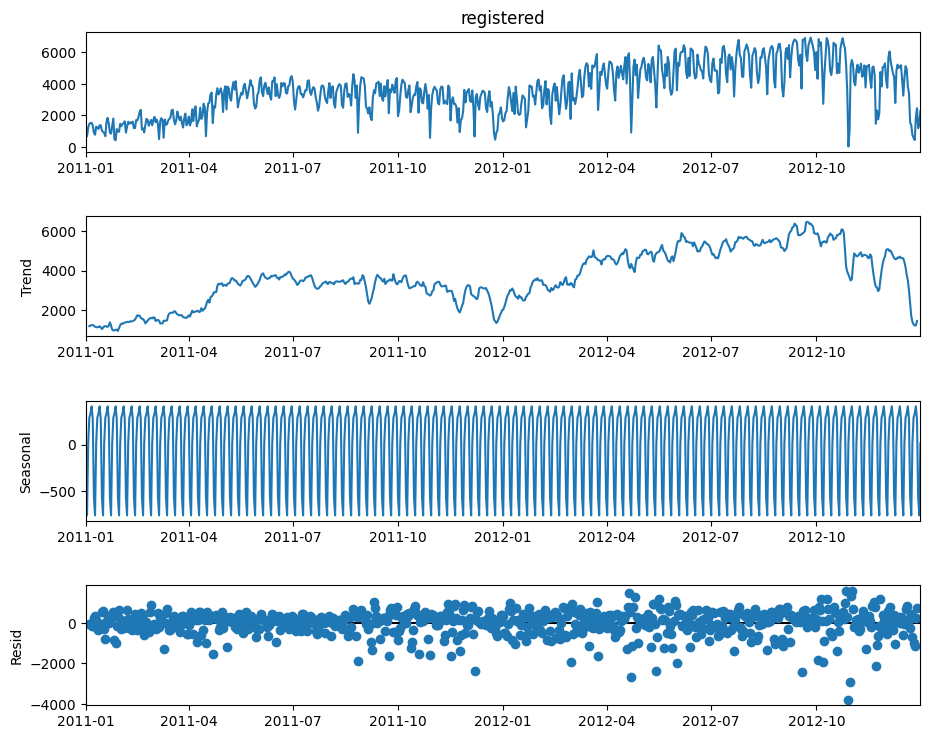

In [ ]:
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)


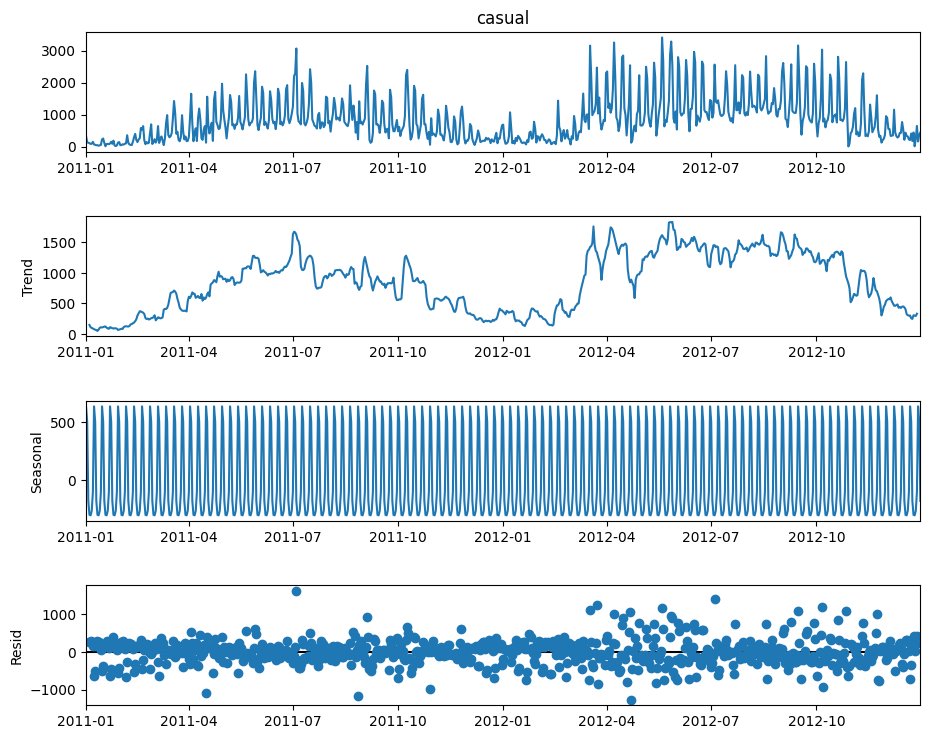

In [ ]:
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

<Figure size 640x480 with 0 Axes>

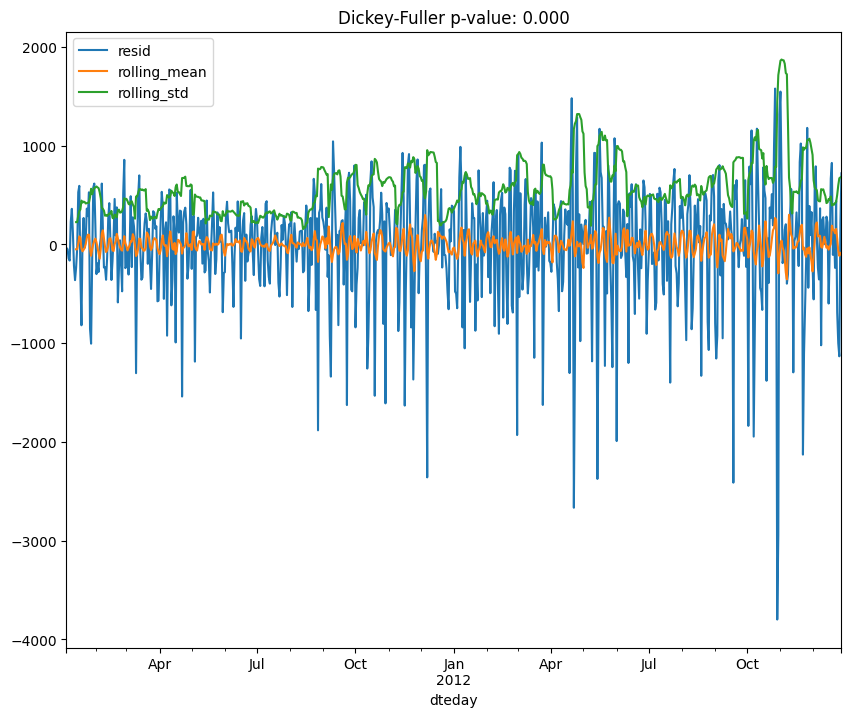

In [ ]:
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), figsize=(10, 8))

<Figure size 640x480 with 0 Axes>

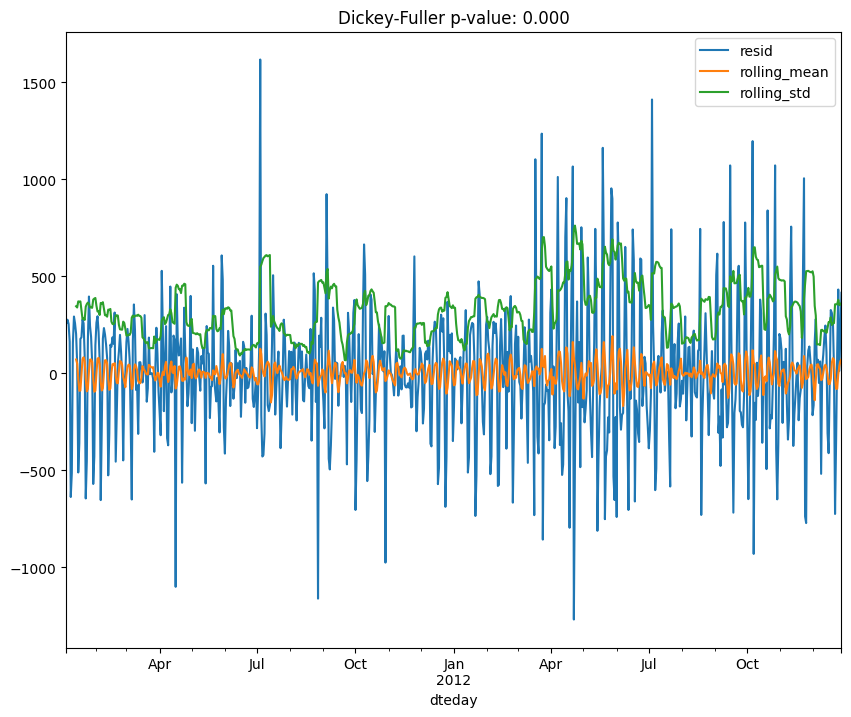

In [ ]:
plt.figure()
test_stationarity(casual_decomposition.resid.dropna(), figsize=(10, 8))

# ARIMA Models

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


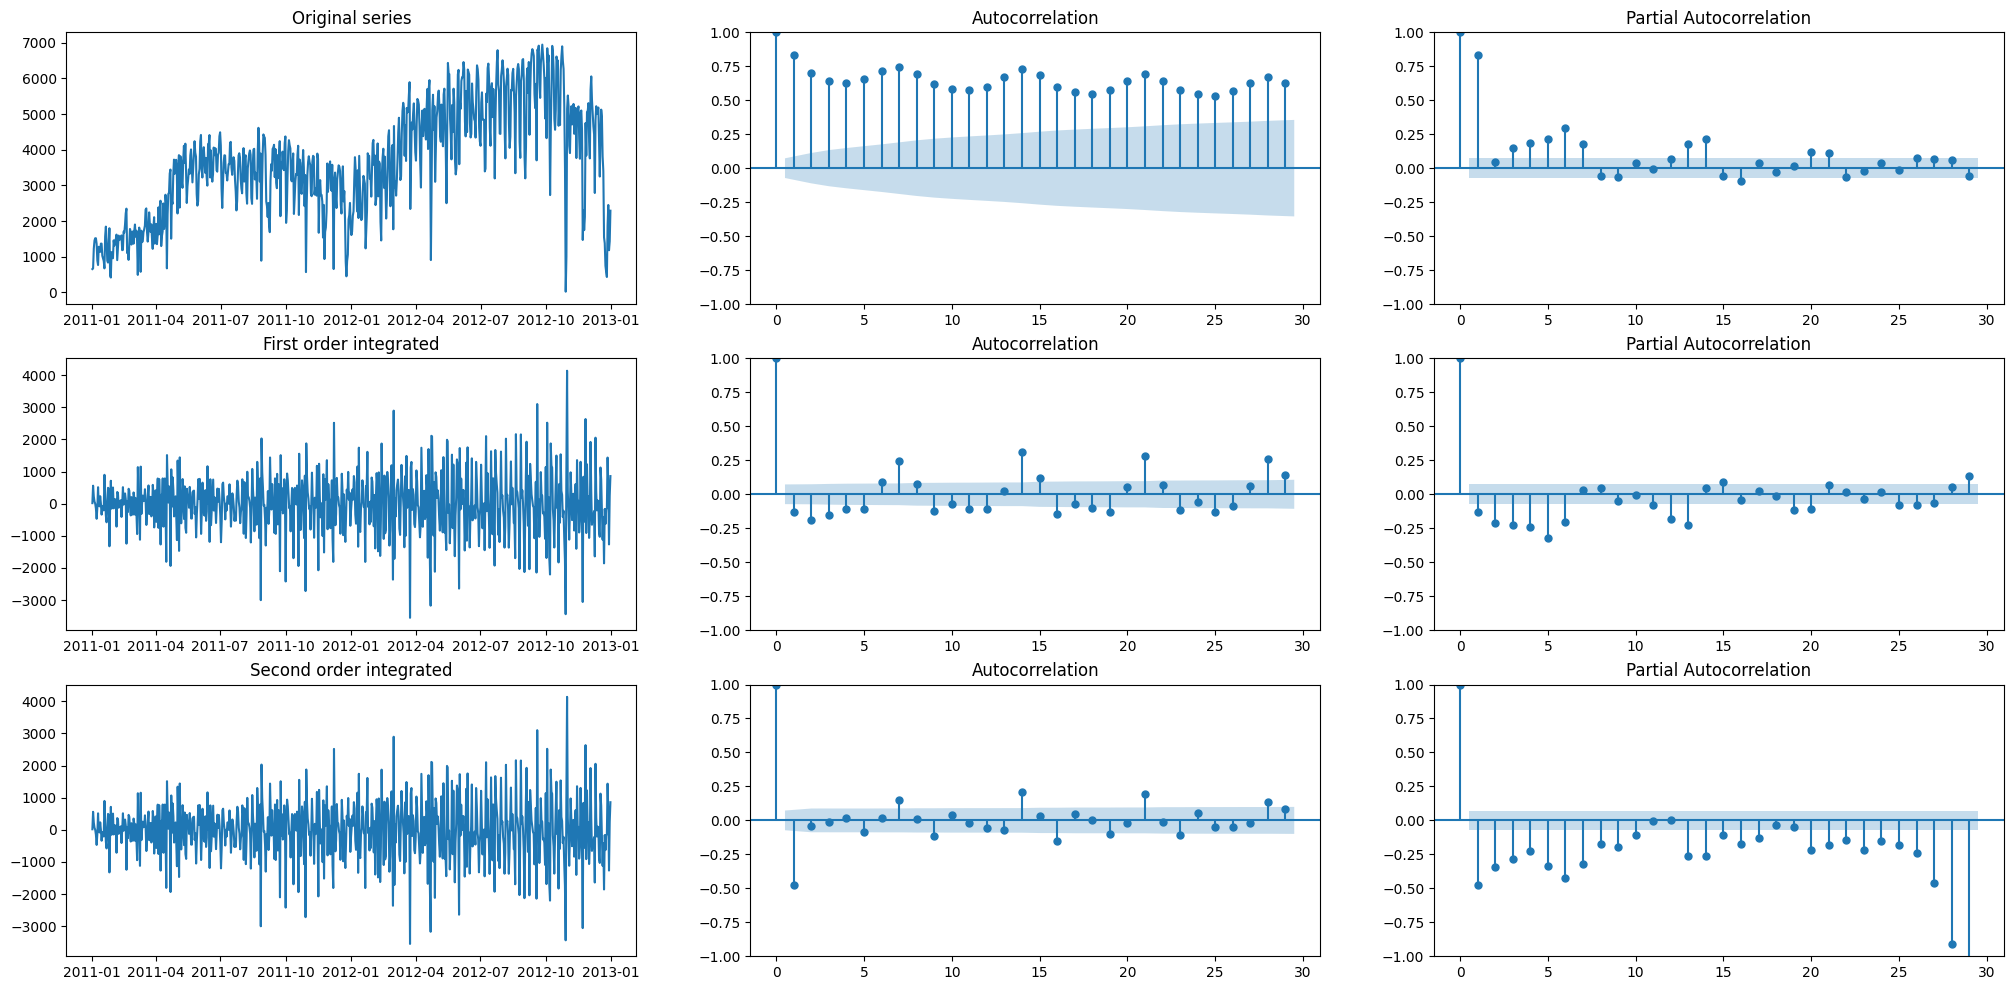

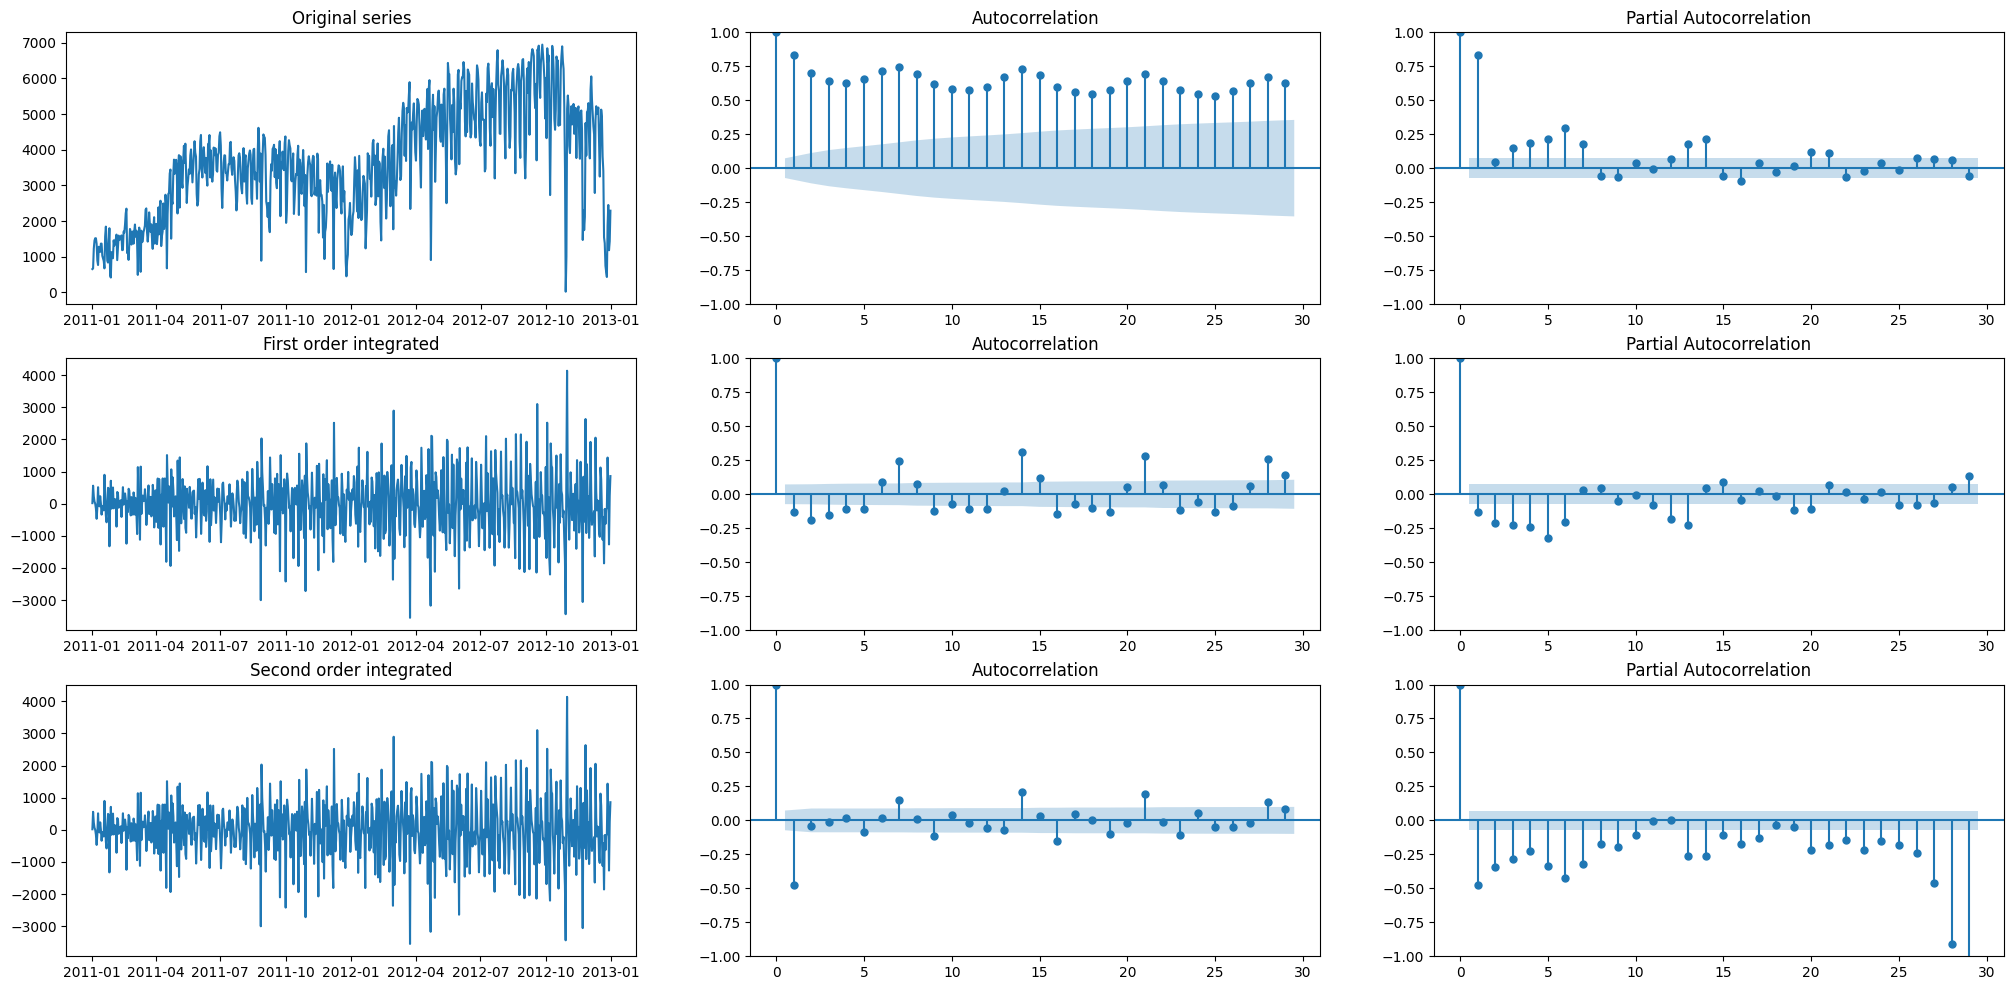

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12))
# plot original series
original = daily_rides["registered"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series")
plot_acf(original, ax=axes[0,1])
plot_pacf(original, ax=axes[0,2])
# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])
# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated")
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])



In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
model = auto_arima(registered, start_p=1, start_q=1, max_p=3, max_q=3, information_criterion="aic")
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5854.522
Date:                Mon, 03 Jul 2023   AIC                          11723.045
Time:                        21:07:28   BIC                          11755.196
Sample:                    01-01-2011   HQIC                         11735.449
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6068      0.050     32.293      0.000       1.509       1.704
ar.L2         -1.4465      0.062    -23.275      0.000      -1.568      -1.325
ar.L3          0.3601      0.049      7.356      0.0

In [ ]:
"""
here using AIC better for small data set to get better acc
"""

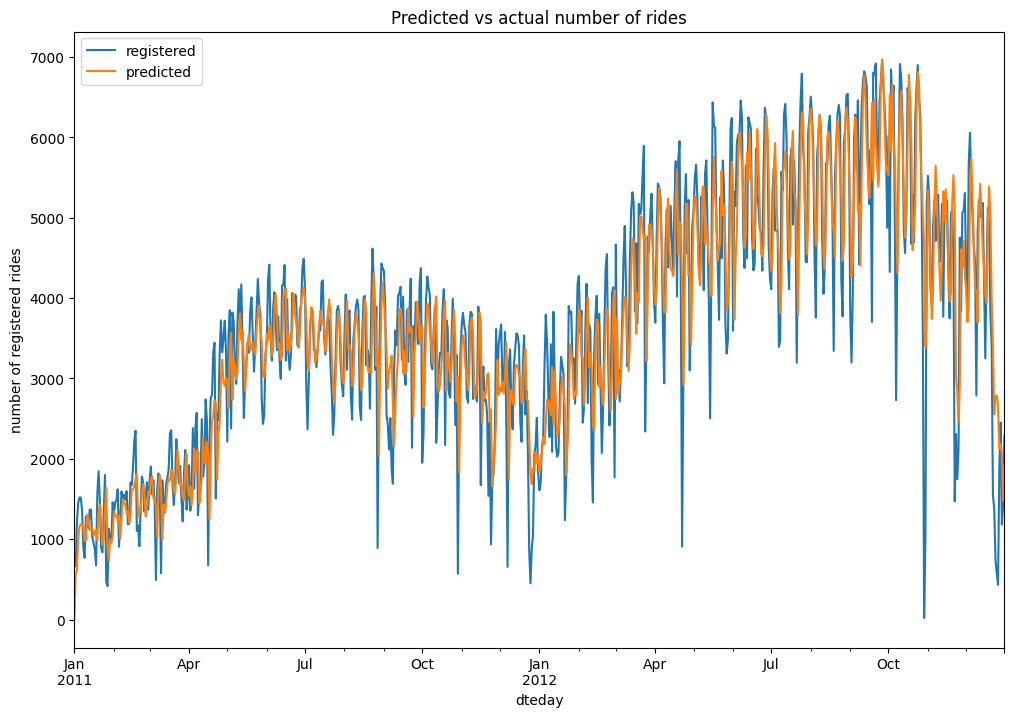

In [ ]:
plot_data = pd.DataFrame(registered)
plot_data['predicted'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs actual number of rides")
plt.show()

# Convert_PDF

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/drive/MyDrive/DA_Projects/Bike_shareING/B_S.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/DA_Projects/Bike_shareING/B_S.ipynb to pdf
[NbConvertApp] Support files will be in B_S_files/
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertApp] Making directory ./B_S_files
[NbConvertAp